In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#reading csv file created by webscraping
df=pd.read_csv('2017-2018_NBA_Player_stats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26104 entries, 0 to 26103
Data columns (total 26 columns):
Unnamed: 0       26104 non-null int64
Player           26104 non-null object
Team             26104 non-null object
Match_up         26104 non-null object
Game_date        26104 non-null object
W_or_L           26104 non-null object
Min              26104 non-null int64
Pts              26104 non-null int64
FGM              26104 non-null int64
FGA              26104 non-null int64
FG_pct           26104 non-null float64
threes_made      26104 non-null int64
threes_attemp    26104 non-null int64
three_pct        26104 non-null float64
FTM              26104 non-null int64
FTA              26104 non-null int64
FTPct            26104 non-null float64
OREB             26104 non-null int64
DREB             26104 non-null int64
REB              26104 non-null int64
AST              26104 non-null int64
STL              26104 non-null int64
BLK              26104 non-null int64
TOV   

In [3]:
df.head()

,Unnamed: 0,Player,Team,Match_up,Game_date,W_or_L,Min,Pts,FGM,FGA,...,FTPct,OREB,DREB,REB,AST,STL,BLK,TOV,PF,plus_minus
0,0,Ryan Arcidiacono,CHI,"['vs.', 'DET']",04/11/2018,L,24,3,1,5,...,0.0,0,3,3,2,1,0,2,0,-17
1,1,Ricky Rubio,UTA,"['@', 'POR']",04/11/2018,L,24,17,5,12,...,100.0,0,5,5,5,1,0,4,5,-10
2,2,LaMarcus Aldridge,SAS,"['@', 'NOP']",04/11/2018,L,23,11,5,12,...,100.0,3,2,5,0,1,0,1,2,-16
3,3,Sam Dekker,LAC,"['vs.', 'LAL']",04/11/2018,L,24,10,5,6,...,0.0,1,7,8,1,1,0,2,3,9
4,4,Amir Johnson,PHI,"['vs.', 'MIL']",04/11/2018,W,15,8,4,5,...,0.0,3,5,8,1,1,0,0,2,15


In [4]:
#cleaning data for data types
numerical_columns=['Min','Pts','FGM','FGA','FG_pct','threes_made','threes_attemp','three_pct','FTM','FTA',
                  'FTPct','OREB','DREB','REB','AST','STL','BLK','TOV','PF','plus_minus']
for column in numerical_columns:
    df[column]=pd.to_numeric(df[column])
df['Game_date']=pd.to_datetime(df['Game_date'],infer_datetime_format=True)
df.drop(df.columns[0],axis=1);

In [5]:
#creating home,Opp_Team,Win columns from Match_up
df['Opp_Team']=df.Match_up.str[-5:-2]
df['home']=df['Match_up'].apply(lambda x: x[2]=='v')
df['win']=df['W_or_L'].apply(lambda x: x=='W')

# Do top 10 Teams win more when they score more?

In [6]:
teams=df.groupby(['Team','Game_date']).agg({'Pts':np.sum,'home':'first','win':'first',
                                            'TOV':np.sum,'FTM':np.sum,'FTA':np.sum,
                                            'REB':np.sum,'AST':np.sum,'PF':np.sum
                                           })
teams['win_numb']=teams['win'].map({True:1,False:0})
teams['FTPct']=np.divide(teams['FTM'],teams['FTA'])

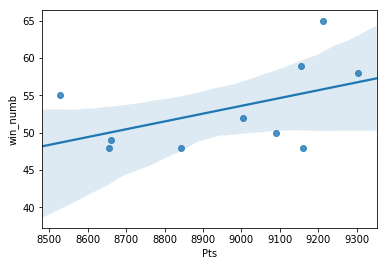

In [7]:
top_ten_teams=teams.groupby('Team').agg({'win_numb':np.sum,'Pts':np.sum}).nlargest(10,'win_numb')
sns.regplot(x='Pts',y='win_numb',data=top_ten_teams);

# How about all teams?

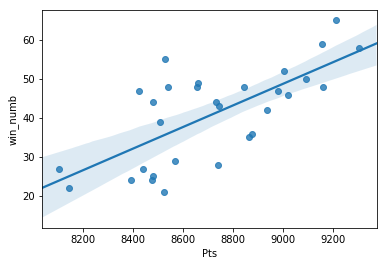

In [8]:
agg_team=teams.groupby('Team').agg({'win_numb':np.sum,'Pts':np.sum,'TOV':np.sum,
                                    'FTM':np.sum,'FTA':np.sum,
                                    'REB':np.sum,'AST':np.sum,'PF':np.sum,'FTPct':np.average
                                   })
sns.regplot(x='Pts',y='win_numb',data=agg_team);

# Team wins against other statistics

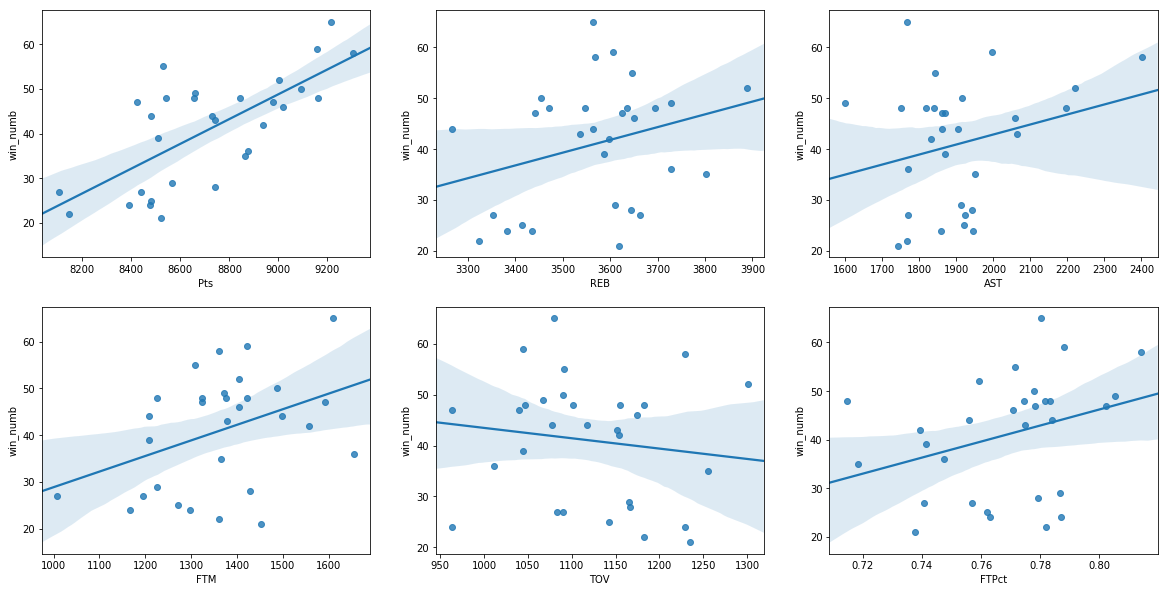

In [9]:
plt.figure(figsize = (20, 10))
plt.subplot(2, 3, 1)
sns.regplot(x='Pts',y='win_numb',data=agg_team);

plt.subplot(2, 3, 2)
sns.regplot(x='REB',y='win_numb',data=agg_team);

plt.subplot(2, 3, 3)
sns.regplot(x='AST',y='win_numb',data=agg_team);

plt.subplot(2, 3, 4)
sns.regplot(x='FTM',y='win_numb',data=agg_team);

plt.subplot(2, 3, 5)
sns.regplot(x='TOV',y='win_numb',data=agg_team);

plt.subplot(2, 3, 6)
sns.regplot(x='FTPct',y='win_numb',data=agg_team);


# Which Players performed the best?

In [10]:
#Top 5 Players by Points
players=df.groupby('Player').agg({'Pts':np.average,'REB':np.average,'AST':np.average})
top_five=players.nlargest(5,'Pts').index.tolist()
players.nlargest(5,'Pts')

,Pts,REB,AST
Player,,,
James Harden,30.430556,5.402778,8.750000
Anthony Davis,28.133333,11.093333,2.320000
LeBron James,27.451220,8.646341,9.109756
Damian Lillard,26.876712,4.452055,6.589041
Giannis Antetokounmpo,26.853333,10.040000,4.813333


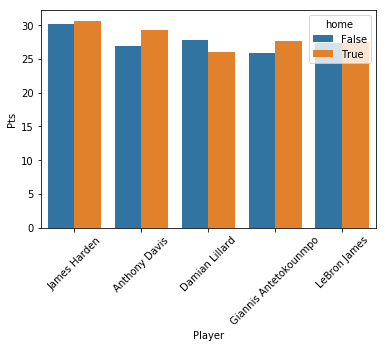

In [11]:
#Top 5 Players with extra information
players_by_home=df.groupby(['Player','home']).agg({'Pts':np.average,'REB':np.average,'AST':np.average})
players_by_home=players_by_home.reset_index()
top_five_players=players_by_home[players_by_home['Player'].isin(top_five)]
top_five_players=top_five_players.sort_values('Pts',ascending=False)
g=sns.barplot(x='Player',y='Pts',hue='home',data=top_five_players)
for item in g.get_xticklabels():
    item.set_rotation(45)

# want to add columnn with rolling player pts average to df

In [12]:
df.head()

,Unnamed: 0,Player,Team,Match_up,Game_date,W_or_L,Min,Pts,FGM,FGA,...,REB,AST,STL,BLK,TOV,PF,plus_minus,Opp_Team,home,win
0,0,Ryan Arcidiacono,CHI,"['vs.', 'DET']",2018-04-11,L,24,3,1,5,...,3,2,1,0,2,0,-17,DET,True,False
1,1,Ricky Rubio,UTA,"['@', 'POR']",2018-04-11,L,24,17,5,12,...,5,5,1,0,4,5,-10,POR,False,False
2,2,LaMarcus Aldridge,SAS,"['@', 'NOP']",2018-04-11,L,23,11,5,12,...,5,0,1,0,1,2,-16,NOP,False,False
3,3,Sam Dekker,LAC,"['vs.', 'LAL']",2018-04-11,L,24,10,5,6,...,8,1,1,0,2,3,9,LAL,True,False
4,4,Amir Johnson,PHI,"['vs.', 'MIL']",2018-04-11,W,15,8,4,5,...,8,1,1,0,0,2,15,MIL,True,True
